In [1]:
!pip install plantuml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [plantuml]


In [2]:
from plantuml import PlantUML
from IPython.display import Image, display

plantuml = PlantUML(url='http://www.plantuml.com/plantuml/png/')

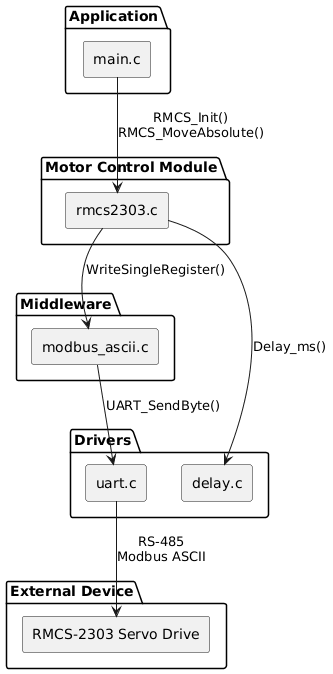

In [3]:
component_uml = """
@startuml
skinparam componentStyle rectangle

package "Application" {
  [main.c]
}

package "Motor Control Module" {
  [rmcs2303.c]
}

package "Middleware" {
  [modbus_ascii.c]
}

package "Drivers" {
  [uart.c]
  [delay.c]
}

package "External Device" {
  [RMCS-2303 Servo Drive]
}

[main.c] --> [rmcs2303.c] : RMCS_Init()\\nRMCS_MoveAbsolute()
[rmcs2303.c] --> [modbus_ascii.c] : WriteSingleRegister()
[rmcs2303.c] --> [delay.c] : Delay_ms()
[modbus_ascii.c] --> [uart.c] : UART_SendByte()

[uart.c] --> [RMCS-2303 Servo Drive] : RS-485\\nModbus ASCII
@enduml
"""

img = plantuml.processes(component_uml)
display(Image(img))

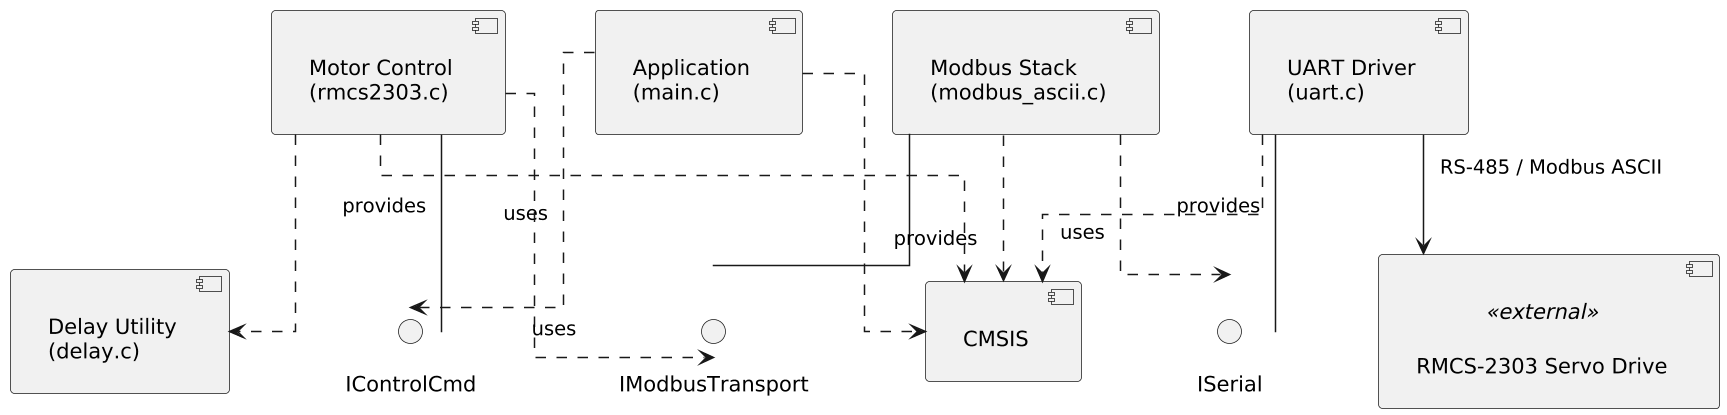

In [4]:
component_uml = """
@startuml
' =========================
' Layout & spacing controls
' =========================
skinparam componentStyle rectangle
skinparam style strictuml
skinparam linetype ortho
top to bottom direction

' Make diagram larger
scale 1.5

' Increase spacing
skinparam ranksep 80
skinparam nodesep 60
skinparam padding 10

skinparam shadowing false

' =========================
' Interfaces
' =========================
interface IControlCmd
interface IModbusTransport
interface ISerial

' =========================
' Components
' =========================
component "Application\\n(main.c)" as APP
component "Motor Control\\n(rmcs2303.c)" as MOTOR
component "Modbus Stack\\n(modbus_ascii.c)" as MODBUS
component "UART Driver\\n(uart.c)" as UART
component "Delay Utility\\n(delay.c)" as DELAY
component "CMSIS" as CMSIS
component "RMCS-2303 Servo Drive" as DRIVE <<external>>

' =========================
' Interface bindings
' =========================
APP ..> IControlCmd : uses
MOTOR -- IControlCmd : provides

MOTOR ..> IModbusTransport : uses
MODBUS -- IModbusTransport : provides

MODBUS ..> ISerial : uses
UART -- ISerial : provides

' =========================
' Dependencies
' =========================
APP ..> CMSIS
MOTOR ..> CMSIS
MODBUS ..> CMSIS
UART ..> CMSIS
MOTOR ..> DELAY

' =========================
' External communication
' =========================
UART --> DRIVE : RS-485 / Modbus ASCII
@enduml
"""

img = plantuml.processes(component_uml)
display(Image(img))

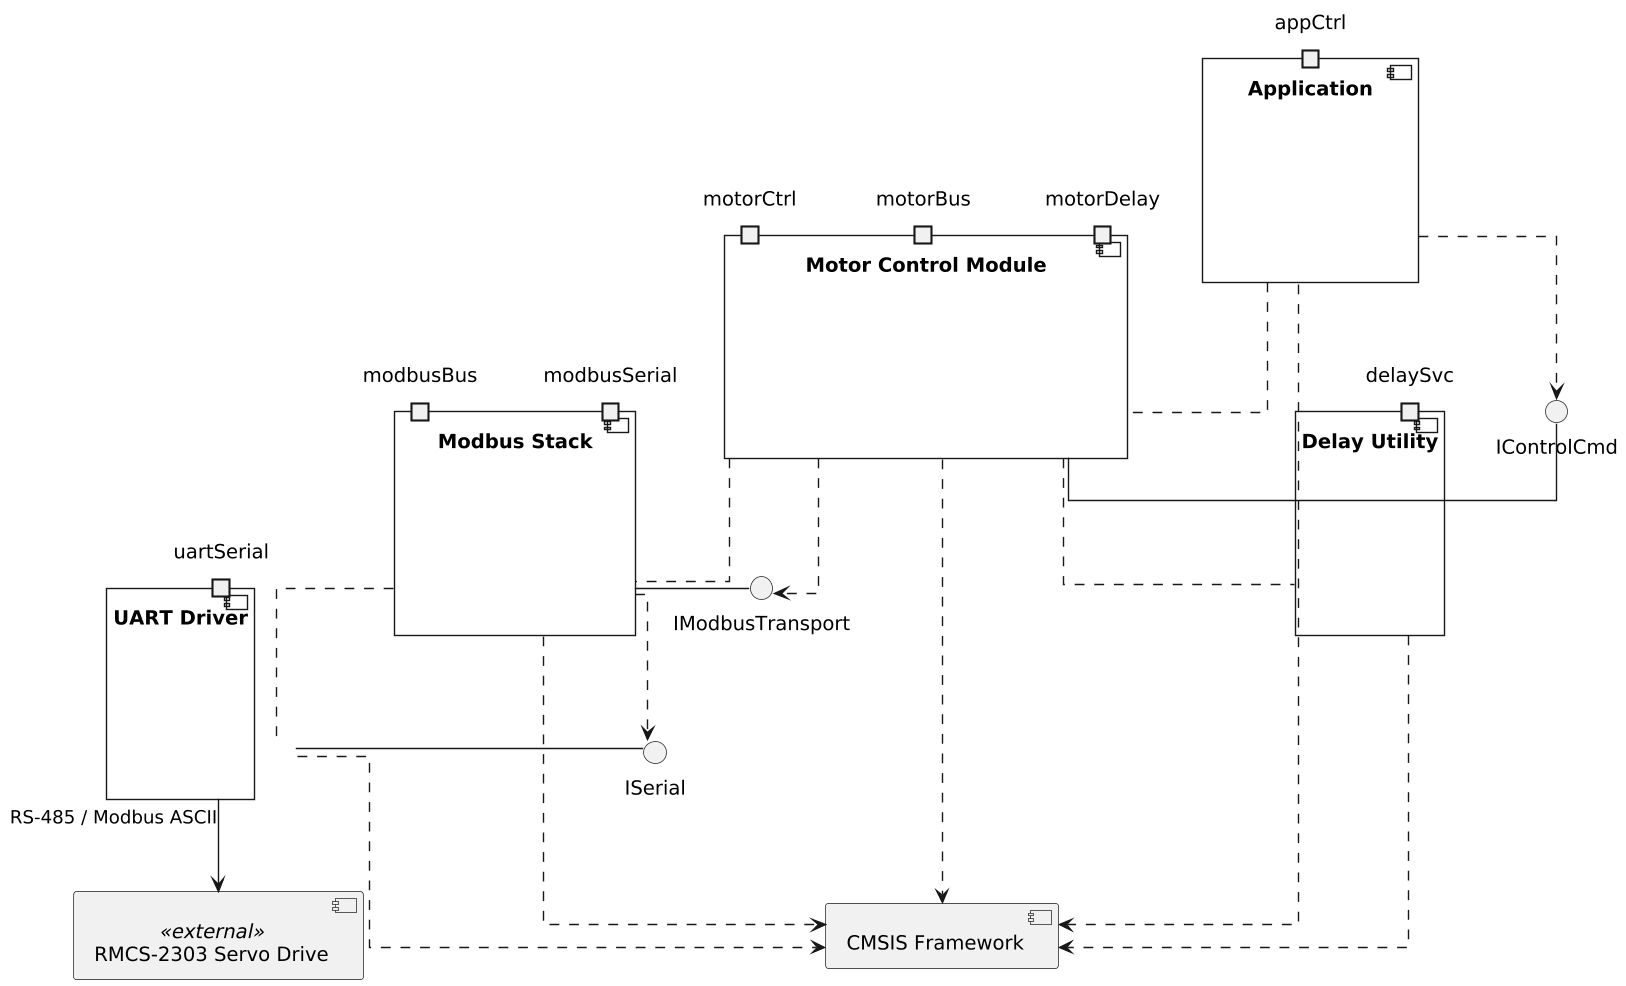

In [5]:

component_uml = r"""
@startuml
skinparam componentStyle uml2
skinparam style strictuml
skinparam linetype ortho
top to bottom direction
skinparam shadowing false

scale 1.4
skinparam ranksep 90
skinparam nodesep 70

' =========================
' Interfaces
' =========================
interface IControlCmd
interface IModbusTransport
interface ISerial

' =========================
' Components with Ports
' =========================
component "Application" as APP {
    port appCtrl
}

component "Motor Control Module" as MOTOR {
    port motorCtrl
    port motorBus
    port motorDelay
}

component "Modbus Stack" as MODBUS {
    port modbusBus
    port modbusSerial
}

component "UART Driver" as UART {
    port uartSerial
}

component "Delay Utility" as DELAY {
    port delaySvc
}

component "CMSIS Framework" as CMSIS
component "RMCS-2303 Servo Drive" as DRIVE <<external>>

' =========================
' Provided Interfaces
' =========================
MOTOR - IControlCmd
MODBUS - IModbusTransport
UART - ISerial

' =========================
' Required Interfaces
' =========================
APP ..> IControlCmd
MOTOR ..> IModbusTransport
MODBUS ..> ISerial

' =========================
' Component Connections
' (Ports indicate interaction points)
' =========================
APP .. MOTOR
MOTOR .. MODBUS
MODBUS .. UART
MOTOR .. DELAY

' =========================
' Framework Dependencies
' =========================
APP ..> CMSIS
MOTOR ..> CMSIS
MODBUS ..> CMSIS
UART ..> CMSIS
DELAY ..> CMSIS

' =========================
' External Communication
' =========================
UART --> DRIVE : RS-485 / Modbus ASCII

@enduml
"""
img = plantuml.processes(component_uml)
display(Image(img))

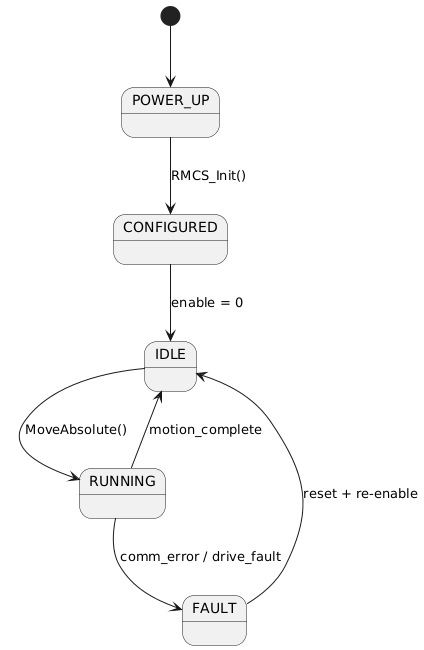

In [6]:
state_uml = """
@startuml
[*] --> POWER_UP

POWER_UP --> CONFIGURED : RMCS_Init()
CONFIGURED --> IDLE : enable = 0
IDLE --> RUNNING : MoveAbsolute()

RUNNING --> IDLE : motion_complete
RUNNING --> FAULT : comm_error / drive_fault

FAULT --> IDLE : reset + re-enable
@enduml
"""

img = plantuml.processes(state_uml)
display(Image(img))

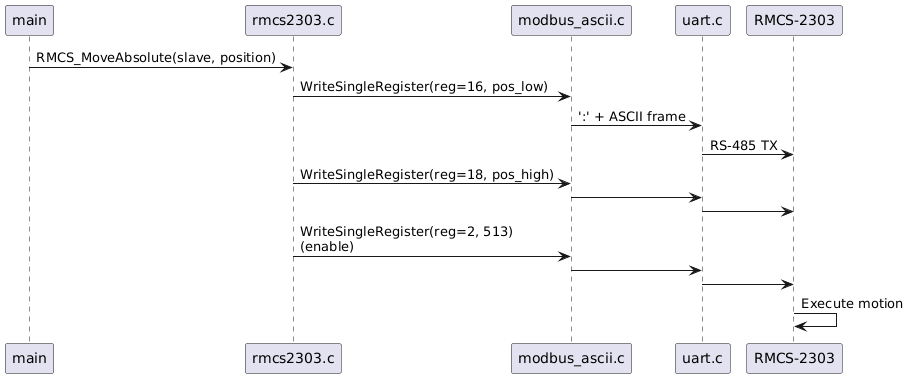

In [7]:
sequence_uml = """
@startuml
participant main
participant "rmcs2303.c" as RMCS
participant "modbus_ascii.c" as MODBUS
participant "uart.c" as UART
participant "RMCS-2303" as DRIVE

main -> RMCS : RMCS_MoveAbsolute(slave, position)

RMCS -> MODBUS : WriteSingleRegister(reg=16, pos_low)
MODBUS -> UART : ':' + ASCII frame
UART -> DRIVE : RS-485 TX

RMCS -> MODBUS : WriteSingleRegister(reg=18, pos_high)
MODBUS -> UART
UART -> DRIVE

RMCS -> MODBUS : WriteSingleRegister(reg=2, 513)\\n(enable)
MODBUS -> UART
UART -> DRIVE

DRIVE -> DRIVE : Execute motion
@enduml
"""

img = plantuml.processes(sequence_uml)
display(Image(img))